# Proyek Analisis Data: Nama dataset
----------------------------------------
## - Kelompok : IF9 - PyTorch

###- Anggota : </br>
10122346 - Muhamad Kevin Fairuz</br>
10122332 - Farhan Bachtiar</br>
10122330 - Naufal Difta Andrian</br>
10122313 - Alfian Putra</br>
10122315 - Kanta Khanigara</br>
10122342 - Tiandry Simatupang</br>


## Menentukan Pertanyaan Bisnis

•	Seller diwilayah mana yang paling banyak menjual produknya di e-commerce ? -10122346 - Muhamad Kevin Fairuz

•	Berapa perbandingan barang terkirim dan tidak terkirim? - 10122330 - Naufal Difta Andrian

•	Metode pembayaran apa yang paling sering digunakan? - 10122332 - Farhan Bachtiar

•	kota mana yang paling banyak membeli barang dari data tersebut? - 10122313 - Alfian Putra

• Rating produk yang paling tertinggi? - 10122342 - Tiandry Simatupang

• Bagaimana tren Penjualan Secara Keselurahan - 10122315 - Kanta Khanigara

## Menyaipkan semua library yang dibuthkan

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelFile

## Data Wrangling

### Gathering Data

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df_data_item = pd.read_csv('/content/drive/MyDrive/dataset/order_items_dataset.csv')
df_data_customer = pd.read_csv('/content/drive/MyDrive/dataset/customers_dataset.csv')
df_data_review = pd.read_csv('/content/drive/MyDrive/dataset/order_reviews_dataset.csv')
df_data_product = pd.read_csv('/content/drive/MyDrive/dataset/products_dataset.csv')
df_data_product_category = pd.read_csv('/content/drive/MyDrive/dataset/product_category_name_translation.csv')
df_data_payments = pd.read_csv('/content/drive/MyDrive/dataset/order_payments_dataset.csv')
df_orders_dataset = pd.read_csv('/content/drive/MyDrive/dataset/orders_dataset.csv')
df_sellers = pd.read_csv('/content/drive/MyDrive/dataset/sellers_dataset.csv')
df_geo = pd.read_csv('/content/drive/MyDrive/dataset/geolocation_dataset.csv')

### Assessing Data

In [ ]:
df_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
df_data_item


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
df_data_customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
df_data_review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [69]:
df_data_product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
df_data_product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
df_data_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
# Menggabungkan kolom df_names1 dan df_names2
df_gabungan = pd.concat([df_data_review, df_data_item], axis=1)
df_gabungan

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5.0,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
# Menggabungkan kolom df_names1 dan df_names2
df_cleaned = pd.concat([df_gabungan, df_data_product], axis=1)
df_cleaned

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_id,order_item_id,product_id,...,freight_value,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,...,13.29,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5.0,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,...,19.93,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,...,17.87,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,...,12.79,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,...,18.14,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,...,43.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,...,36.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,...,16.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,...,8.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Data

#Drop Data Review

In [ ]:
review = df_data_review[df_data_review.isna().any(axis=1)]
review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
df_review = df_data_review.dropna()

In [ ]:
df_review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
99187,47e0954e156dac6512c25c6d2ecc1c66,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,"Muito obrigado,\r\n\r\nExcelente atendimento,b...",2018-05-22 00:00:00,2018-05-23 00:51:43
99192,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04 00:00:00,2018-07-05 00:25:13
99196,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30 00:00:00,2018-07-02 23:09:35
99197,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00,2018-06-06 10:52:19


In [ ]:
# Menggabungkan table
df_cleaned = pd.concat([df_gabungan, df_data_product_category], axis=1)
df_cleaned


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,beleza_saude,health_beauty
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5.0,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,informatica_acessorios,computers_accessories
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,automotivo,auto
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,cama_mesa_banho,bed_bath_table
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,moveis_decoracao,furniture_decor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,NaN,NaN
112646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,NaN,NaN
112647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,NaN,NaN
112648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,NaN,NaN


In [ ]:
gabungan = df_cleaned[df_cleaned.isna().any(axis=1)]
gabungan

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,beleza_saude,health_beauty
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5.0,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,informatica_acessorios,computers_accessories
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,automotivo,auto
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,cama_mesa_banho,bed_bath_table
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,moveis_decoracao,furniture_decor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,NaN,NaN
112646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,NaN,NaN
112647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,NaN,NaN
112648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,NaN,NaN


In [ ]:
df_gabungan_cleaned = df_cleaned.dropna()
df_gabungan_cleaned

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4.0,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,relogios_presentes,watches_gifts
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5.0,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,0009792311464db532ff765bf7b182ae,1,8cab8abac59158715e0d70a36c807415,530ec6109d11eaaf87999465c6afee01,2018-08-17 12:15:10,99.90,27.65,telefonia_fixa,fixed_telephony
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1.0,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,000e562887b1f2006d75e0be9558292e,1,5ed9eaf534f6936b51d0b6c5e4d5c2e9,8cbac7e12637ed9cffa18c7875207478,2018-02-28 12:08:37,25.00,16.11,consoles_games,consoles_games
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5.0,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25,000f25f4d72195062c040b12dce9a18a,1,1c05e0964302b6cf68ca0d15f326c6ba,7c67e1448b00f6e969d365cea6b010ab,2018-03-21 11:10:11,119.99,44.40,cool_stuff,cool_stuff
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4.0,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,artigos_de_festas,party_supplies
36,08c9d79ec0eba1d252e3f52f14b8e6a9,e029f708df3cc108b3264558771605c6,5.0,Bom,"Recomendo ,",2018-06-13 00:00:00,2018-06-13 22:54:44,0015ebb40fb17286bea51d4607c4733c,1,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-01-18 09:11:24,21.90,15.10,construcao_ferramentas_ferramentas,costruction_tools_tools
38,b193ff3c9f32a01f3a0d9ae26b94d244,e2e6ee1ed2d7f2f36b05d234983bd7a0,5.0,Maravilhoso!,"Tô completamente apaixonada, loja super respon...",2018-08-10 00:00:00,2018-08-11 00:22:13,0016dfedd97fc2950e388d2971d718c7,1,4089861a1bd4685da70bddd6b4f974f1,a35124e2d763d7ca3fbe3b97d143200f,2017-05-05 10:05:12,49.75,20.80,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
43,86c5cfa7fcbde303f704b60a78ced7d6,a6456e781cb962cc3f412b04de4fed7b,5.0,Entrega perfeita,Muito bom. muito cheiroso.,2018-06-13 00:00:00,2018-06-14 17:29:03,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,construcao_ferramentas_iluminacao,construction_tools_lights
59,500c05500aa275953129f49799ee5c73,8a9424899aac432d80d8e580932b5ee9,5.0,MT lindo,MT lindo,2018-07-25 00:00:00,2018-07-25 21:37:22,00254baeb6c932b0a8aeead91fbd02b5,1,18901878788fec7ddc55e64d1ace8187,e8b4225284fbb02d16f200513f1f395d,2018-05-14 22:14:46,149.90,43.11,cine_foto,cine_photo
67,109b5ce2dd11bb8460eff3b86da6fefc,25362fbf6aac4b01a28dee1e076acc26,5.0,Ótimo Produto!,Recomendo o vendedor...,2018-08-17 00:00:00,2018-08-17 21:47:08,002834535f7a609a5c68266f173fa59e,1,df3655ac9aa8c6cbfa63bdd8d3b09c50,ea8482cd71df3c1969d7b9473ff13abc,2018-07-26 17:44:36,37.99,19.18,artes_e_artesanato,arts_and_craftmanship


## Drop Data Orders

In [ ]:
orders = df_orders_dataset[df_orders_dataset.isna().any(axis=1)]
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [ ]:
df_orders = df_orders_dataset.dropna()
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


## Drop Data Payment

In [ ]:
df_data_payments.index[df_data_payments['payment_type']=="not_defined"]

Int64Index([51280, 57411, 94427], dtype='int64')

In [70]:
dpay = df_data_payments

In [ ]:
dpay.drop(dpay.index[dpay['payment_type']=="not_defined"],inplace = True)

In [ ]:
df = df_sellers[df_sellers.isna().any(axis=1)]
df

,seller_id,seller_zip_code_prefix,seller_city,seller_state


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
baik = df_data_review[df_data_review['review_score'] >=3]
kurang = df_data_review[df_data_review['review_score'] <3]

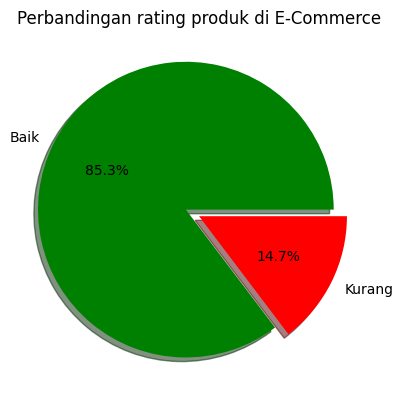

In [ ]:
warna = ['green','red']
deskripsi = ["Baik","Kurang"]
produk = [baik['review_id'].count(),kurang['review_id'].count()]
expose = [0.1, 0]
plt.title('Perbandingan rating produk di E-Commerce')
plt.pie(produk,
        labels=deskripsi,
        autopct='%1.1f%%',
        colors = warna,
        shadow = True,
        explode = expose)

plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:seller diwilayah mana yang paling banyak menjual produknya di e-commerce ?

In [71]:
# EDA Exploratory Data Analysis
seller = list(df_sellers['seller_state'])
rekapSeller = {}
for data in seller:
    if data in rekapSeller :
        rekapSeller[data] += 1
    else :
        rekapSeller[data] = 1
print(rekapSeller)

{'SP': 1849, 'RJ': 171, 'PE': 9, 'PR': 349, 'GO': 40, 'SC': 190, 'BA': 19, 'DF': 30, 'RS': 129, 'MG': 244, 'RN': 5, 'MT': 4, 'CE': 13, 'PB': 6, 'AC': 1, 'ES': 23, 'RO': 2, 'PI': 1, 'MS': 5, 'SE': 2, 'MA': 1, 'AM': 1, 'PA': 1}


Text(0, 0.5, 'Jumlah  Penjualan')

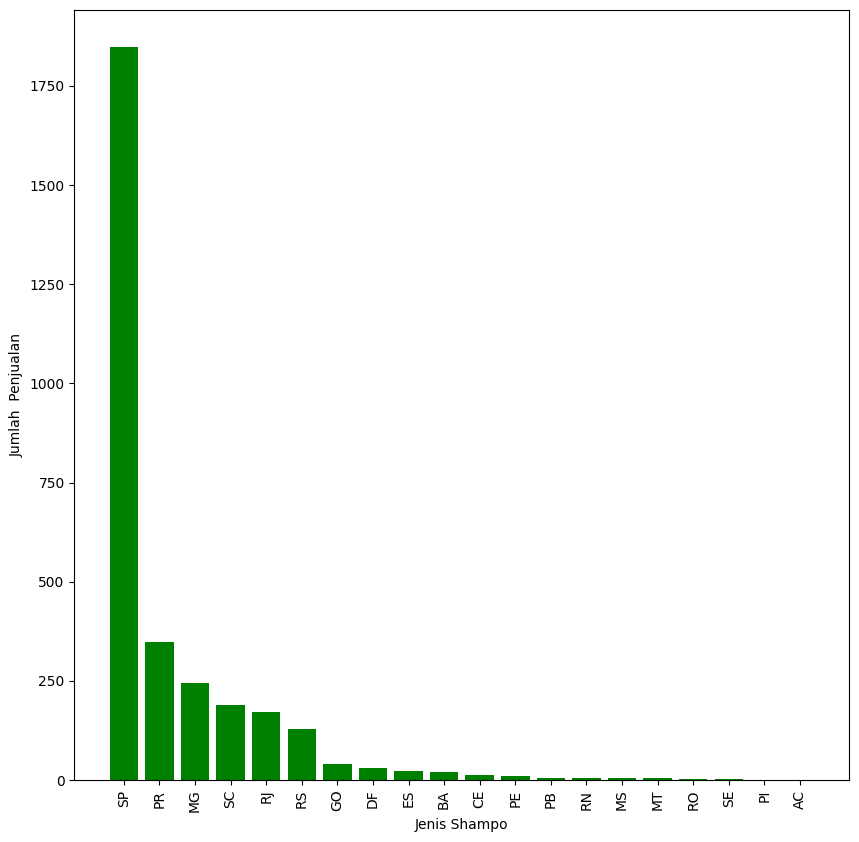

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
top = df_sellers['seller_state'].value_counts().head(20).to_dict()
plt.bar(top.keys() ,
        top.values(),
        color='green')
plt.xticks(rotation=90)
plt.xlabel('Jenis Shampo')
plt.ylabel('Jumlah  Penjualan')


### Pertanyaan 2: Berapa perbandingan barang terkirim dan tidak terkirim?

In [ ]:
#Perbandingan barang terkirim dan tidak terkirim
delivered = df_orders_dataset[df_orders_dataset['order_status'] == 'delivered']
undelivered = df_orders_dataset[df_orders_dataset['order_status'] != 'delivered']

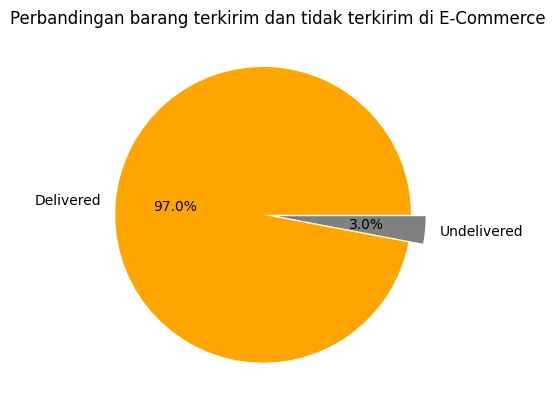

In [ ]:
warna = ['orange','Grey']
deskripsi = ["Delivered","Undelivered"]
produk = [delivered['order_status'].count(),undelivered['order_status'].count()]
expose = [0.1, 0]
plt.title('Perbandingan barang terkirim dan tidak terkirim di E-Commerce')
plt.pie(produk,
        labels=deskripsi,
        autopct='%1.1f%%',
        colors = warna,
        explode = expose)

plt.show()

### Pertanyaan 3: Metode pembayaran apa yang paling sering digunakan?

In [ ]:
dpay.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [ ]:
dpay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103883 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103883 non-null  object 
 1   payment_sequential    103883 non-null  int64  
 2   payment_type          103883 non-null  object 
 3   payment_installments  103883 non-null  int64  
 4   payment_value         103883 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [ ]:
dpay.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
payment = list(dpay['payment_type'])
rekapPayment = {}
for data in payment:
    if data in rekapPayment :
        rekapPayment[data] += 1
    else :
        rekapPayment[data] = 1
print(rekapPayment)

{'credit_card': 76795, 'boleto': 19784, 'voucher': 5775, 'debit_card': 1529}


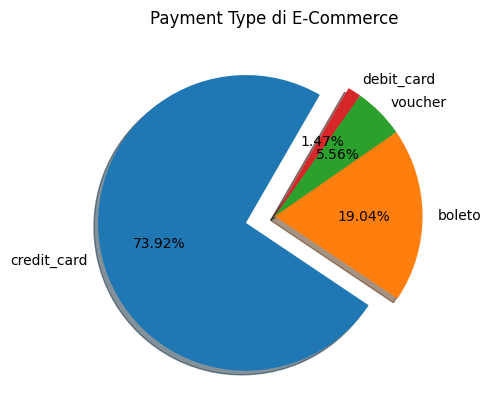

In [ ]:
# Visualisasi Data
segments_expose = [0.2,0,0,0]
plt.pie(
    rekapPayment.values(),
    labels = rekapPayment.keys(),
    autopct='%1.2f%%',
    explode=segments_expose,
    startangle=60,
    shadow = True
)

plt.title('Payment Type di E-Commerce')
plt.show()

In [ ]:
dpayy = dpay['payment_type'].value_counts()
dpayy

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

Text(0, 0.5, 'Penggunaan')

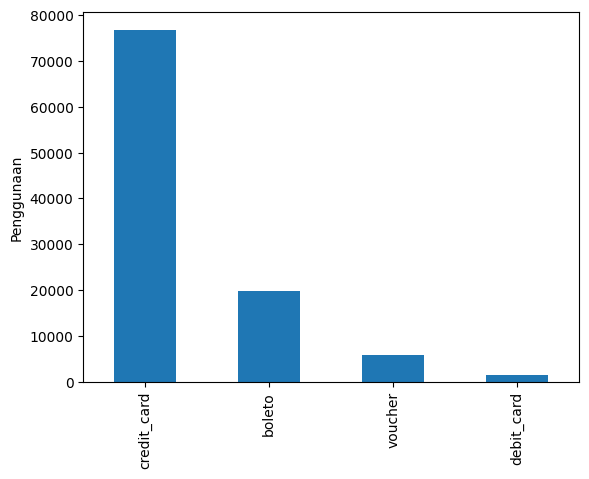

In [ ]:
dpayy.plot(kind='bar')
plt.ylabel('Penggunaan')

### Pertanyaan 4:kota mana yang paling banyak membeli barang dari data tersebut?

In [ ]:
dcust = df_data_customer.head(20)

In [ ]:
dcustt = dcust['customer_city'].value_counts()
dcustt

sao paulo                4
rio de janeiro           2
franca                   1
sao bernardo do campo    1
mogi das cruzes          1
campinas                 1
jaragua do sul           1
timoteo                  1
curitiba                 1
belo horizonte           1
montes claros            1
lencois paulista         1
caxias do sul            1
piracicaba               1
guarulhos                1
pacaja                   1
Name: customer_city, dtype: int64

Text(0, 0.5, 'Total Pengorderan')

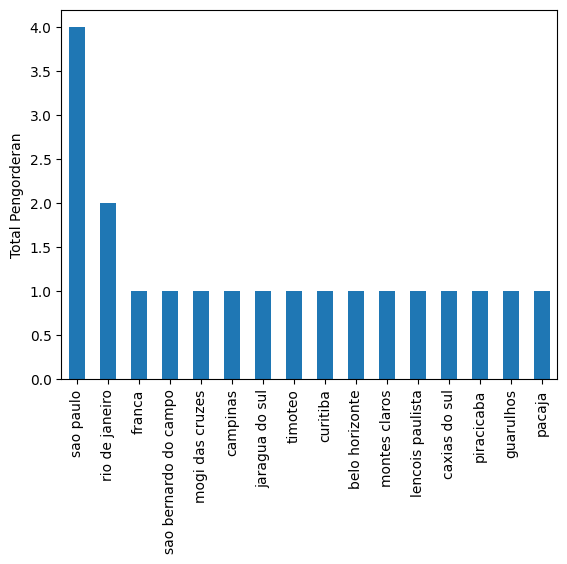

In [ ]:
dcustt.plot(kind='bar')
plt.ylabel('Total Pengorderan')

### Pertanyaan 5: Rating produk yang paling tertinggi dan terendah?


In [ ]:
dcust = df_data_product.head(30)

In [ ]:
dcustt = dcust['product_category_name'].value_counts()
dcustt

moveis_decoracao                    5
esporte_lazer                       3
bebes                               3
cama_mesa_banho                     3
informatica_acessorios              3
perfumaria                          2
utilidades_domesticas               2
instrumentos_musicais               2
artes                               1
cool_stuff                          1
eletrodomesticos                    1
brinquedos                          1
construcao_ferramentas_seguranca    1
beleza_saude                        1
malas_acessorios                    1
Name: product_category_name, dtype: int64

In [ ]:
review = list(df_gabungan_cleaned['review_score'])
rekapReview = {}
for data in review:
    if data in rekapReview :
        rekapReview[data] += 1
    else :
        rekapReview[data] = 1
print(rekapReview)

{4.0: 2, 5.0: 7, 1.0: 1}


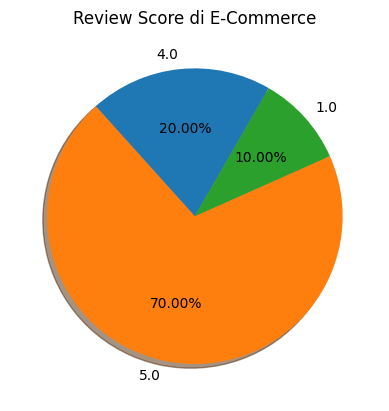

In [ ]:
# Visualisasi Data
pie_review = [0,0,0]
plt.pie(
    rekapReview.values(),
    labels = rekapReview.keys(),
    autopct='%1.2f%%',
    explode=pie_review,
    startangle=60,
    shadow = True
)

plt.title('Review Score di E-Commerce')
plt.show()

In [ ]:
barang = df_gabungan_cleaned[df_gabungan_cleaned['review_score'] > 0]
barang = barang.sort_values(by='product_category_name_english',ascending=False)
max = barang['review_score'].max()
min = barang['review_score'].min()

In [ ]:
barang[barang['review_score'] == max]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
38,b193ff3c9f32a01f3a0d9ae26b94d244,e2e6ee1ed2d7f2f36b05d234983bd7a0,5.0,Maravilhoso!,"Tô completamente apaixonada, loja super respon...",2018-08-10 00:00:00,2018-08-11 00:22:13,0016dfedd97fc2950e388d2971d718c7,1,4089861a1bd4685da70bddd6b4f974f1,a35124e2d763d7ca3fbe3b97d143200f,2017-05-05 10:05:12,49.75,20.80,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5.0,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,0009792311464db532ff765bf7b182ae,1,8cab8abac59158715e0d70a36c807415,530ec6109d11eaaf87999465c6afee01,2018-08-17 12:15:10,99.90,27.65,telefonia_fixa,fixed_telephony
36,08c9d79ec0eba1d252e3f52f14b8e6a9,e029f708df3cc108b3264558771605c6,5.0,Bom,"Recomendo ,",2018-06-13 00:00:00,2018-06-13 22:54:44,0015ebb40fb17286bea51d4607c4733c,1,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-01-18 09:11:24,21.90,15.10,construcao_ferramentas_ferramentas,costruction_tools_tools
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5.0,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25,000f25f4d72195062c040b12dce9a18a,1,1c05e0964302b6cf68ca0d15f326c6ba,7c67e1448b00f6e969d365cea6b010ab,2018-03-21 11:10:11,119.99,44.40,cool_stuff,cool_stuff
43,86c5cfa7fcbde303f704b60a78ced7d6,a6456e781cb962cc3f412b04de4fed7b,5.0,Entrega perfeita,Muito bom. muito cheiroso.,2018-06-13 00:00:00,2018-06-14 17:29:03,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,construcao_ferramentas_iluminacao,construction_tools_lights
59,500c05500aa275953129f49799ee5c73,8a9424899aac432d80d8e580932b5ee9,5.0,MT lindo,MT lindo,2018-07-25 00:00:00,2018-07-25 21:37:22,00254baeb6c932b0a8aeead91fbd02b5,1,18901878788fec7ddc55e64d1ace8187,e8b4225284fbb02d16f200513f1f395d,2018-05-14 22:14:46,149.90,43.11,cine_foto,cine_photo
67,109b5ce2dd11bb8460eff3b86da6fefc,25362fbf6aac4b01a28dee1e076acc26,5.0,Ótimo Produto!,Recomendo o vendedor...,2018-08-17 00:00:00,2018-08-17 21:47:08,002834535f7a609a5c68266f173fa59e,1,df3655ac9aa8c6cbfa63bdd8d3b09c50,ea8482cd71df3c1969d7b9473ff13abc,2018-07-26 17:44:36,37.99,19.18,artes_e_artesanato,arts_and_craftmanship


In [ ]:
barang[barang['review_score'] == min]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1.0,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,000e562887b1f2006d75e0be9558292e,1,5ed9eaf534f6936b51d0b6c5e4d5c2e9,8cbac7e12637ed9cffa18c7875207478,2018-02-28 12:08:37,25.0,16.11,consoles_games,consoles_games


### Pertanyaan 6: Bagaimana tren Penjualan Secara Keselurahan

In [ ]:
#Penaggabungan File
df_payod = pd.merge(df_orders_dataset, df_data_payments, on='order_id')

In [ ]:
# Mengubah ke Datetime ke Interger
df_payod['order_purchase_timestamp'] = pd.to_datetime(df_payod['order_purchase_timestamp'])

In [ ]:
# Grup Tahun dan Bulan
df_trend = df_payod.groupby('order_purchase_timestamp').sum()['payment_value'].reset_index()

<ipython-input-132-348bcc8e8967>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_trend = df_payod.groupby('order_purchase_timestamp').sum()['payment_value'].reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

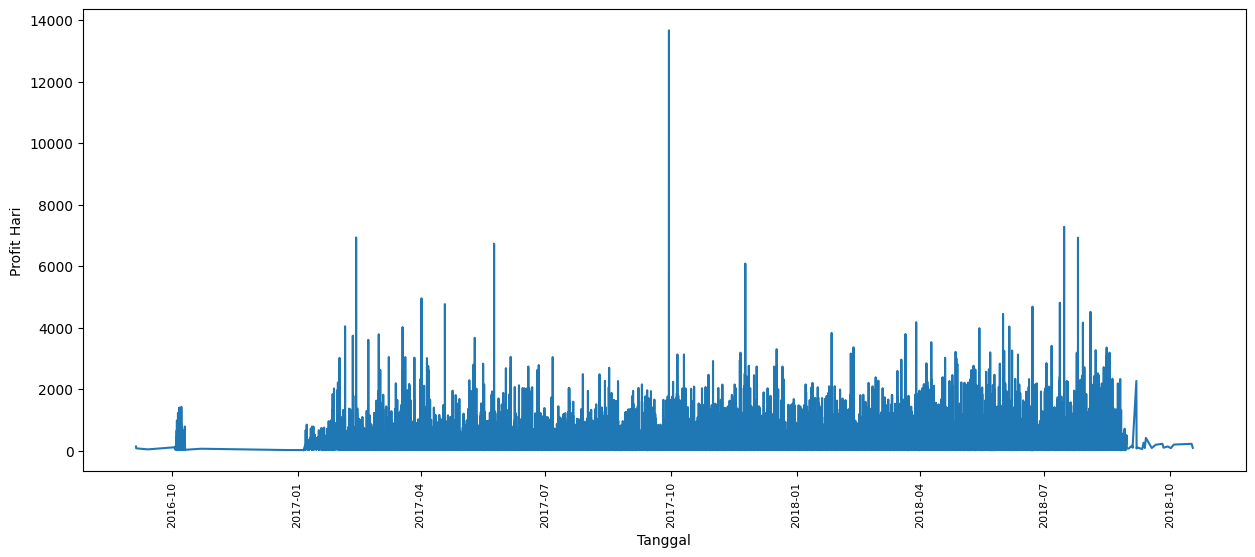

In [ ]:
#Mengatur Tampilan
plt.figure(figsize=(15,6))
plt.plot(df_trend['order_purchase_timestamp'],df_trend['payment_value'])
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Tanggal')
plt.ylabel('Profit Hari')
plt.show

## Conclusion

###- Conclution pertanyaan 1

Kesimpulan dari pertanyaan ini adalah data penyebaran seller yang paling banyak menjual barang, yang nantinya data ini dapat digunakan oleh pihak yang membutuhkan khuhsnya pihak e-commerce. Dimana data ini dapat digunakan untuk mendata penyebaran barang untuk seller yang lebih banyak menjual barang, karena agar ketersediaan barang selalu terjaga.

###- Conclution pertanyaan 2



kesimpulannya dari data yang di tampilkan dapat dilihat bahwa 97% pengiriman berhasil dan sampai kepada customer ini menujukan bahwa performa pengiriman dari seller sangati baik. Data ini dapat digunakan nantinya untuk evaluasi dan penghargaan bagi orang-orang yang terkait.

###- Conclution pertanyaan 3



kesimpulanya Metode pemabayaran yang sering diguanakan adalah kartu kredit, sehingga kita bisa memberikan banyak penawaran dengan metode pemabayaran tersebut sehingga dapat menarik perhatian pengguna untung membeli barang barang di toko sehingga penjualan dari toko pun akan dapat meningkat.

###- Conclution pertanyaan 4

kesimpulan dari data diatas kota yang paling banyak memiliki customer yang  membeli produk adalah di kota sao paulo, dari data tersebut kita dapat menyimpulkan peredaran barang untuk di edarkan lebih baik nantinya oleh pihak ekspedisi.

###- Conclution pertanyaan 5

kesimpulannya adalah Jika sebagian besar pengguna memberikan rating tinggi, itu menunjukkan bahwa kategori tersebut memenuhi atau bahkan melebihi harapan pelanggan sedangkan kategori yang rendah tidak memenuhi harapan pelanggan. Data ini nantinya dapat digunakan oleh seller untuk mengevaluasi produk-produk yang ia jual.

###- Conclution pertanyaan 6

Kesimpulan untuk Tren Penjualan secara keseluruhan tetapi ditahun 2017 menjadi data yang penjualan terbesar untuk sekali pembelian ataupun order dibandingkan tahun tahun yang lain. ini bisa menjadikan sebuah rencana atau strategis agar bisa mendapatkan penjualan terbesar kembali.

## Analisis Lanjutan Data Mining pada Dataset Produk

Ini adalah notebook untuk melakukan analisis lanjutan menggunakan teknik data mining pada dataset produk.

### Analisis Statistik

Melakukan analisis statistik dasar untuk mendapatkan wawasan awal dari data.

### Eksplorasi Data

Pertama, kita akan memuat dan mengeksplorasi dataset untuk memahami struktur dan jenis data yang kita miliki.

### Pemodelan Prediktif

Menerapkan model machine learning untuk membuat prediksi atau klasifikasi berdasarkan data.

### Analisis Asosiasi dan Korelasi

Mencari hubungan antar fitur menggunakan teknik seperti analisis korelasi dan aturan asosiasi.

### Clustering

Mengelompokkan produk berdasarkan atribut atau perilaku yang serupa menggunakan algoritma clustering.

In [ ]:
# Loading the products dataset
products_data = df_data_product

# Displaying the first few rows
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [59]:
# Corrected predictive modeling using RandomForestClassifier
# Including the necessary import for train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Preprocessing
df = products_data.dropna()  # Removing rows with missing values for simplicity
X = df[['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]
y = df['product_category_name']

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.15      0.25        13
           1       0.00      0.00      0.00        24
           2       0.50      0.25      0.33        16
           3       0.33      0.08      0.12        13
           4       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         6
           6       0.67      0.20      0.31        10
           7       0.50      0.12      0.20        16
           8       0.50      0.52      0.51       370
           9       0.55      0.43      0.48       189
          10       0.71      0.17      0.28        29
          11       0.38      0.52      0.44       499
          12       0.34      0.32      0.33       252
          13       0.65      0.85      0.74       627
          14       0.64      0.50      0.56        18
          15       0.00      0.00      0.00         2
          16       0.79      0.38      0.51        50
          18       0.50    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Correlation analysis
correlation_matrix = products_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis of Product Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


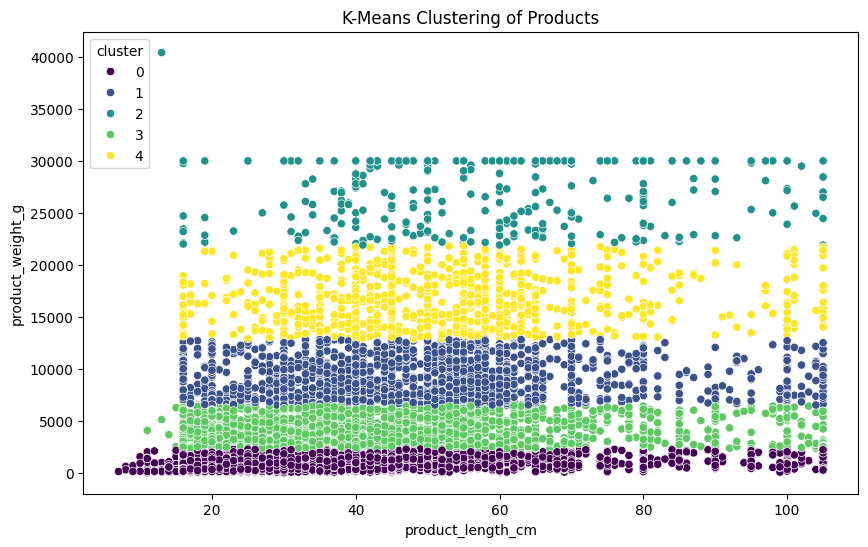

In [72]:
# Clustering using K-Means
# For simplicity, let's use only two features: 'product_weight_g' and 'product_length_cm'

# Selecting features for clustering
clustering_data = products_data[['product_weight_g', 'product_length_cm']].dropna()

# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clustering_data['cluster'] = kmeans.fit_predict(clustering_data)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_length_cm', y='product_weight_g', hue='cluster', data=clustering_data, palette='viridis')
plt.title('K-Means Clustering of Products')
plt.show()

## Analisis Lanjutan Geoanalysis

Ini adalah notebook untuk melakukan analisis lanjutan menggunakan data geolokasi.

### Pengenalan Data

Pertama, kita akan memuat data dari file CSV yang diberikan dan menampilkan beberapa baris pertama untuk memahami struktur data.

### Menggunakan Sampel Data

Untuk memudahkan analisis awal, kita akan menggunakan sampel data. Ini mempercepat proses dan memudahkan eksplorasi data.

In [ ]:
sample_geo_data = df_geo.sample(n=100, random_state=1)
sample_geo_data.head()

In [ ]:
sample_geo_data.describe()

In [ ]:
import folium

# Create a map
m = folium.Map(location=[sample_geo_data['geolocation_lat'].mean(), sample_geo_data['geolocation_lng'].mean()], zoom_start=5)

# Add points to the map
for idx, row in sample_geo_data.iterrows():
    folium.CircleMarker([row['geolocation_lat'], row['geolocation_lng']], radius=3, fill=True).add_to(m)

# Display the map
m

### Analisis Klaster

Menggunakan algoritma klaster seperti K-Means untuk mengidentifikasi kelompok lokasi yang serupa.

In [ ]:
from sklearn.cluster import KMeans


# Using KMeans for clustering
kmeans = KMeans(n_clusters=5)
sample_geo_data['cluster'] = kmeans.fit_predict(sample_geo_data[['geolocation_lat', 'geolocation_lng']])

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='geolocation_lng', y='geolocation_lat', hue='cluster', data=sample_geo_data, palette='viridis')
plt.title('Cluster Analysis of Geolocations')
plt.show()

### Heatmaps

Membuat heatmap untuk memvisualisasikan konsentrasi lokasi.

In [ ]:
import folium
from folium.plugins import HeatMap

# Creating a heatmap
heatmap_map = folium.Map(location=[sample_geo_data['geolocation_lat'].mean(), sample_geo_data['geolocation_lng'].mean()], zoom_start=5)
HeatMap(data=sample_geo_data[['geolocation_lat', 'geolocation_lng']], radius=15).add_to(heatmap_map)

# Display the heatmap
heatmap_map

### Bagi-bagi Tugas



1.   Kevin   = Mengerjakn Dasboard streamlit secara general
2.   Farhan  = lanjutan geoanalisi dan streamlitnya
3.   Naufal  = lanjutan data mining dan streamlitnya
4.   Tiandry = membantu mengerjakan streamlit
5.   Kanta   = membantu mengerjakan streamlit
6.   Alfian  = membantu mengerjakan streamlit
